In [44]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
import math

In [45]:
df = pd.read_csv('train_v2.csv', nrows = 10000)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       10000 non-null  object
 1   customDimensions      10000 non-null  object
 2   date                  10000 non-null  int64 
 3   device                10000 non-null  object
 4   fullVisitorId         10000 non-null  uint64
 5   geoNetwork            10000 non-null  object
 6   hits                  10000 non-null  object
 7   socialEngagementType  10000 non-null  object
 8   totals                10000 non-null  object
 9   trafficSource         10000 non-null  object
 10  visitId               10000 non-null  int64 
 11  visitNumber           10000 non-null  int64 
 12  visitStartTime        10000 non-null  int64 
dtypes: int64(4), object(8), uint64(1)
memory usage: 1015.8+ KB


In [47]:
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",3162355547410993243,"{""continent"": ""Europe"", ""subContinent"": ""Weste...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508198450,1,1508198450
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8934116514970143966,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""referralPath"": ""/a/google.com/transportation...",1508176307,6,1508176307
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7992466427990357681,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1508201613,1,1508201613
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9075655783635761930,"{""continent"": ""Asia"", ""subContinent"": ""Western...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508169851,1,1508169851
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6960673291025684308,"{""continent"": ""Americas"", ""subContinent"": ""Cen...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508190552,1,1508190552


In [48]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [49]:
for cols in json_columns:
    df_norm = pd.json_normalize([json.loads(val) for val in df[cols]]).fillna(0)
    df = pd.merge(df, df_norm, left_index=True, right_index=True)

In [50]:
df = df.drop(['socialEngagementType', 'browserVersion', 'browserSize', 'operatingSystemVersion',
              'mobileDeviceBranding', 'adwordsClickInfo.criteriaParameters', 'mobileDeviceModel', 
              'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 
              'language', 'screenColors', 'screenResolution', 'metro', 'city', 'adwordsClickInfo.isVideoAd',
              'cityId', 'networkDomain', 'latitude', 'longitude', 'networkLocation',
              'campaign', 'keyword', 'referralPath', 'adwordsClickInfo.gclId',
              'device', 'geoNetwork', 'totals', 'trafficSource', 'customDimensions', 'hits_x', 'visits'
             ], axis=1)

In [51]:
df.replace(['(not set)', 'not available in demo dataset', '(none)'], np.nan, inplace=True)
df['isTrueDirect'].replace(0, 'False', inplace=True)
df['adContent'].replace(0, np.nan, inplace=True)
df['adwordsClickInfo.adNetworkType'].replace(0, np.nan, inplace=True)
df['adwordsClickInfo.slot'].replace(0, np.nan, inplace=True)

In [52]:
df['pageviews'] = df['pageviews'].astype(int)
df['newVisits'] = df['newVisits'].astype(int)
df['bounces'] = df['bounces'].astype(int)
df['hits_y'] = df['hits_y'].astype(int)
df['sessionQualityDim'] = df['sessionQualityDim'].astype(int)
df['timeOnSite'] = df['timeOnSite'].astype(int)
df['transactions'] = df['transactions'].astype(int)
df['transactionRevenue'] = df['transactionRevenue'].astype(int)
df['totalTransactionRevenue'] = df['totalTransactionRevenue'].astype(int)
df['fullVisitorId'] = df['fullVisitorId'].astype(str)
df['visitId'] = df['visitId'].astype(str)

In [53]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['weekday'] = df['date'].dt.weekday
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   channelGrouping                 10000 non-null  object        
 1   date                            10000 non-null  datetime64[ns]
 2   fullVisitorId                   10000 non-null  object        
 3   visitId                         10000 non-null  object        
 4   visitNumber                     10000 non-null  int64         
 5   visitStartTime                  10000 non-null  int64         
 6   browser                         10000 non-null  object        
 7   operatingSystem                 9945 non-null   object        
 8   isMobile                        10000 non-null  bool          
 9   deviceCategory                  10000 non-null  object        
 10  continent                       9986 non-null   object        
 11  sub

In [55]:
df.describe()

,visitNumber,visitStartTime,hits_y,pageviews,bounces,newVisits,sessionQualityDim,timeOnSite,transactions,transactionRevenue,totalTransactionRevenue,weekday,day,month,year
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.287900,1.497411e+09,4.982300,4.099400,0.464500,0.751300,2.309100,132.618900,0.010600,1.156590e+06,1.460947e+06,2.364600,18.011000,8.95850,2016.738700
std,7.026532,1.667878e+07,9.309342,6.635806,0.498763,0.432281,9.128488,343.628931,0.106249,2.145496e+07,3.328134e+07,1.596221,11.030487,3.06224,0.439365
min,1.000000,1.472800e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,1.00000,2016.000000
25%,1.000000,1.472880e+09,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,9.00000,2016.000000
50%,1.000000,1.508174e+09,2.000000,2.000000,0.000000,1.000000,1.000000,9.000000,0.000000,0.000000e+00,0.000000e+00,3.000000,16.000000,10.00000,2017.000000
75%,1.000000,1.512051e+09,5.000000,4.000000,1.000000,1.000000,1.000000,99.000000,0.000000,0.000000e+00,0.000000e+00,4.000000,30.000000,11.00000,2017.000000
max,317.000000,1.512115e+09,189.000000,138.000000,1.000000,1.000000,93.000000,4534.000000,2.000000,1.077000e+09,2.103690e+09,4.000000,30.000000,11.00000,2017.000000


In [56]:
df['fullVisitorId'].duplicated().sum()

790

In [57]:
df_2 = df.groupby(['fullVisitorId']).agg({'channelGrouping': pd.Series.mode, 
                                         'date': pd.Series.mode, 
                                         'visitId': 'max', 
                                         'visitNumber': 'max', 
                                         'visitStartTime': 'mean',
                                         'browser': pd.Series.mode,
                                         'operatingSystem': pd.Series.mode,
                                         'isMobile': pd.Series.mode,
                                         'deviceCategory': pd.Series.mode,
                                         'continent': pd.Series.mode,
                                         'subContinent': pd.Series.mode,
                                         'country': pd.Series.mode,
                                         'hits_y': 'sum',
                                         'pageviews': 'sum',
                                         'bounces': 'sum',
                                         'newVisits': 'sum',
                                         'sessionQualityDim': 'mean',
                                         'timeOnSite': 'sum',
                                         'transactions': 'sum',
                                         'transactionRevenue': 'sum',
                                         'totalTransactionRevenue': 'sum',
                                         'source': pd.Series.mode,
                                         'weekday': pd.Series.mode,
                                         'day': pd.Series.mode,
                                         'month': pd.Series.mode,
                                         'year': pd.Series.mode
                                        }).reset_index()

In [58]:
df_2.to_csv('df_clean.csv', index=False)

In [59]:
df_clean = pd.read_csv('df_clean.csv')

In [60]:
df_clean.head()

,fullVisitorId,channelGrouping,date,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,...,sessionQualityDim,timeOnSite,transactions,transactionRevenue,totalTransactionRevenue,source,weekday,day,month,year
0,1002211220666816283,Organic Search,2017-10-16 00:00:00,1508211988,1,1.508212e+09,Chrome,Windows,False,desktop,...,1.0,0,0,0,0,google,0,16,10,2017
1,1003163948327617003,Organic Search,2017-10-16 00:00:00,1508208414,1,1.508208e+09,Safari,iOS,True,mobile,...,1.0,0,0,0,0,google,0,16,10,2017
2,1003603370068451269,Direct,2017-10-16 00:00:00,1508172579,1,1.508173e+09,Chrome,Android,True,mobile,...,1.0,0,0,0,0,(direct),0,16,10,2017
3,1004815406280493342,Direct,2017-10-16 00:00:00,1508192070,1,1.508192e+09,Chrome,Android,True,mobile,...,1.0,70,0,0,0,(direct),0,16,10,2017
4,1005132064962959014,Organic Search,2017-10-16 00:00:00,1508164370,1,1.508164e+09,Chrome,Macintosh,False,desktop,...,1.0,0,0,0,0,google,0,16,10,2017


In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9210 entries, 0 to 9209
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            9210 non-null   uint64 
 1   channelGrouping          9210 non-null   object 
 2   date                     9210 non-null   object 
 3   visitId                  9210 non-null   int64  
 4   visitNumber              9210 non-null   int64  
 5   visitStartTime           9210 non-null   float64
 6   browser                  9210 non-null   object 
 7   operatingSystem          9210 non-null   object 
 8   isMobile                 9210 non-null   bool   
 9   deviceCategory           9210 non-null   object 
 10  continent                9210 non-null   object 
 11  subContinent             9210 non-null   object 
 12  country                  9210 non-null   object 
 13  hits_y                   9210 non-null   int64  
 14  pageviews               

In [63]:
df_clean['fullVisitorId'] = df_clean['fullVisitorId'].astype(str)
df_clean['visitId'] = df_clean['visitId'].astype(str)

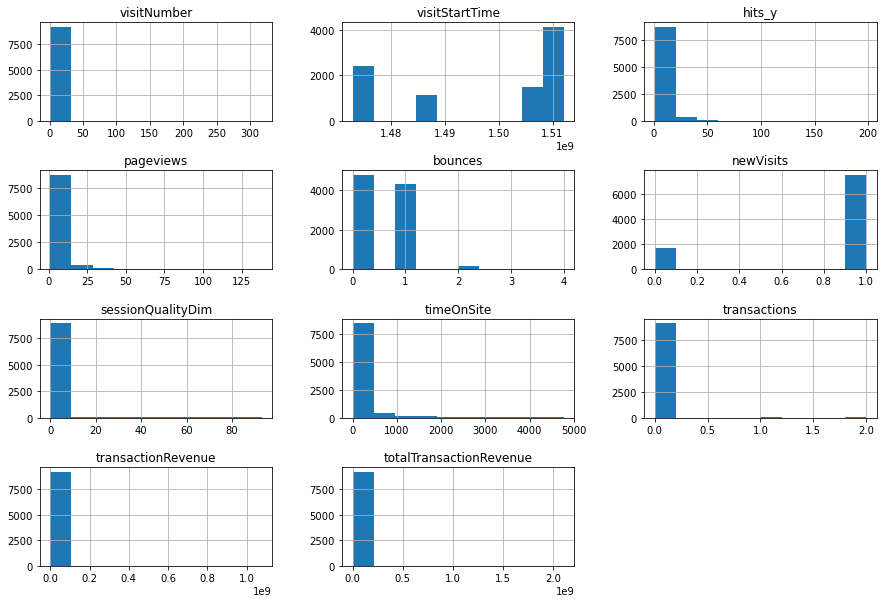

In [64]:
df_clean.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

In [65]:
df_none_zero = df_clean[df_clean['totalTransactionRevenue'] > 0]

In [66]:
w = 50000000
n = math.ceil((df_clean['totalTransactionRevenue'].max() - df_clean['totalTransactionRevenue'].min())/w)

In [67]:
n

43

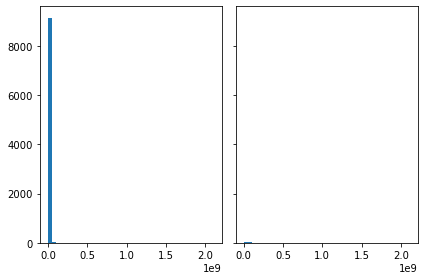

<Figure size 1080x720 with 0 Axes>

In [68]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
plt.figure(figsize=(15, 10))
ax[0].hist(df_clean['totalTransactionRevenue'], bins = n)
ax[1].hist(df_none_zero['totalTransactionRevenue'], bins = n);

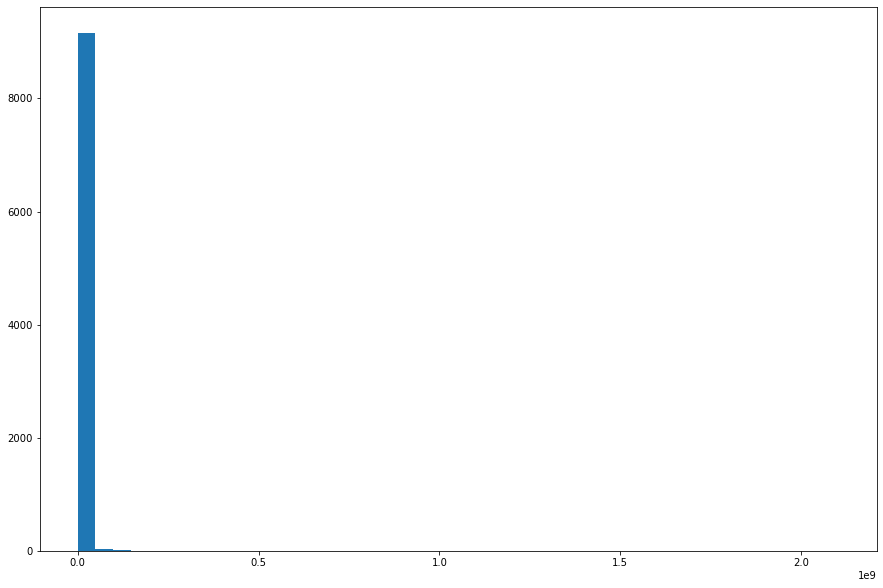

In [71]:
# all transactions
plt.figure(figsize=(15, 10))
plt.hist(df_clean['totalTransactionRevenue'], bins = n);

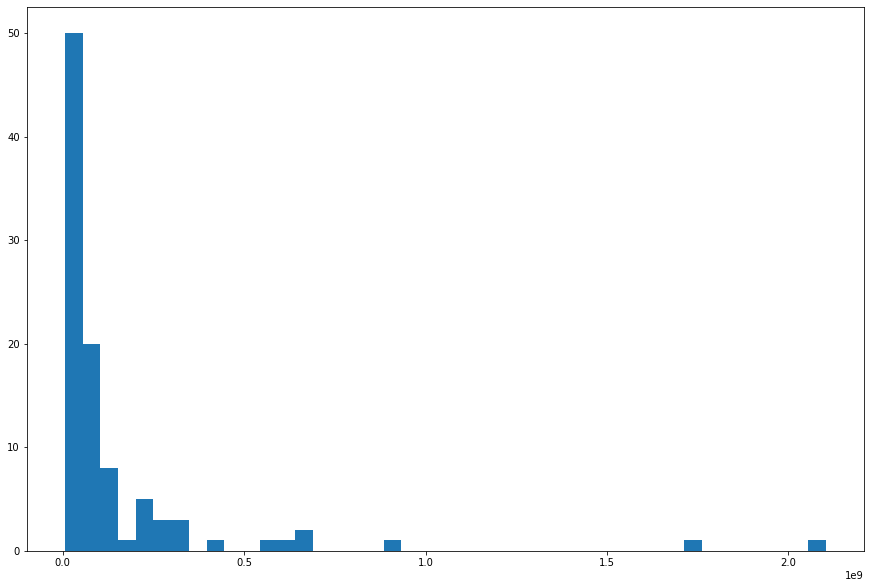

In [100]:
# none zero transactions revenue
plt.figure(figsize=(15, 10))
plt.hist(df_none_zero['totalTransactionRevenue'], bins = n);

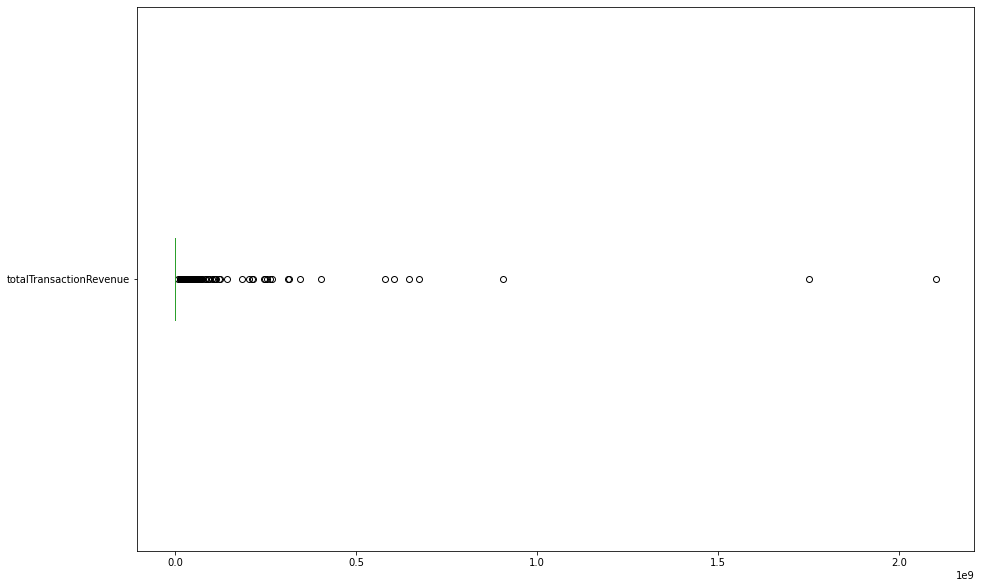

In [73]:
# all transactions
plt.figure(figsize=(15, 10))
df_clean['totalTransactionRevenue'].plot(kind='box', vert=False);

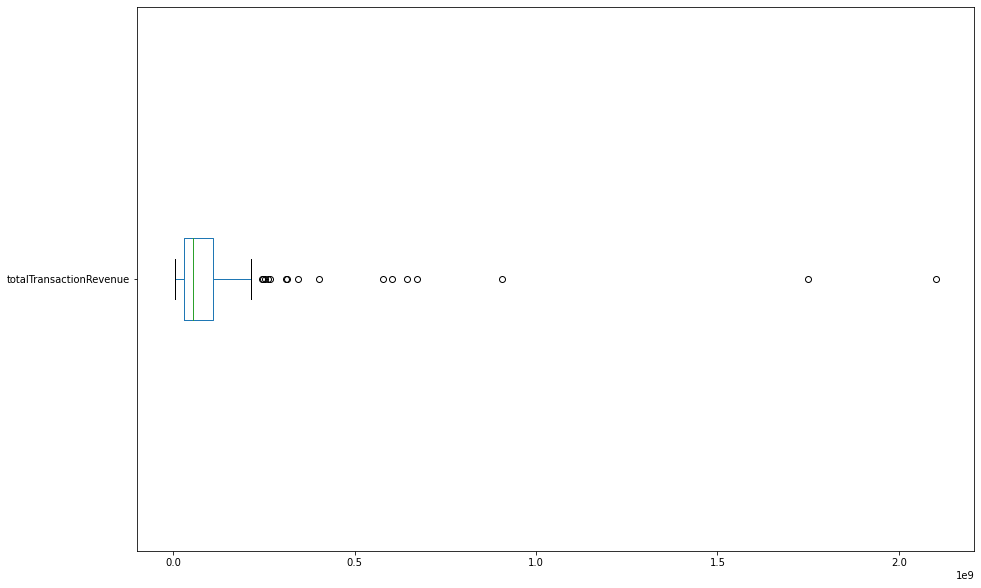

In [101]:
# none zero transactions revenue
plt.figure(figsize=(15, 10))
df_none_zero['totalTransactionRevenue'].plot(kind='box', vert=False);

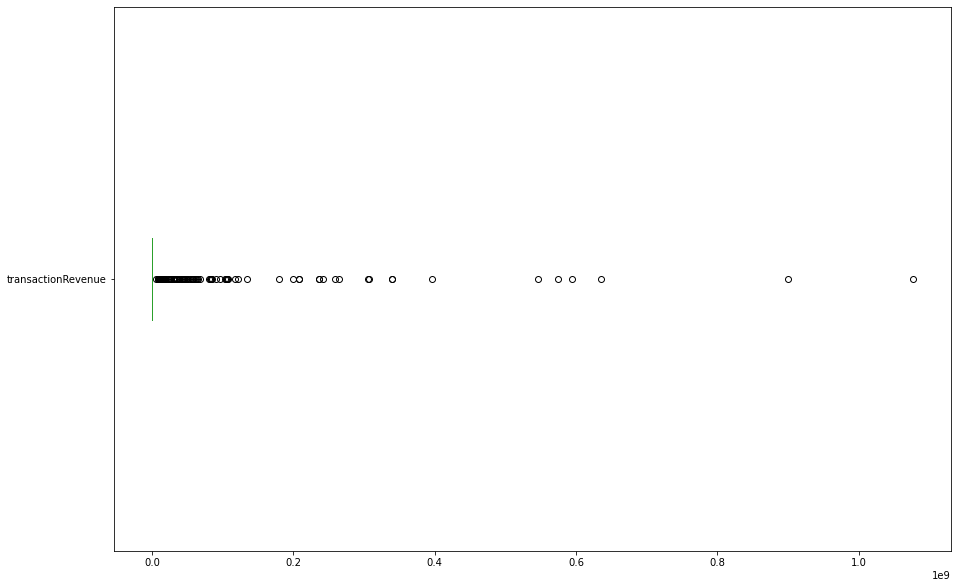

In [74]:
# all transactions
plt.figure(figsize=(15, 10))
df_clean['transactionRevenue'].plot(kind='box', vert=False);

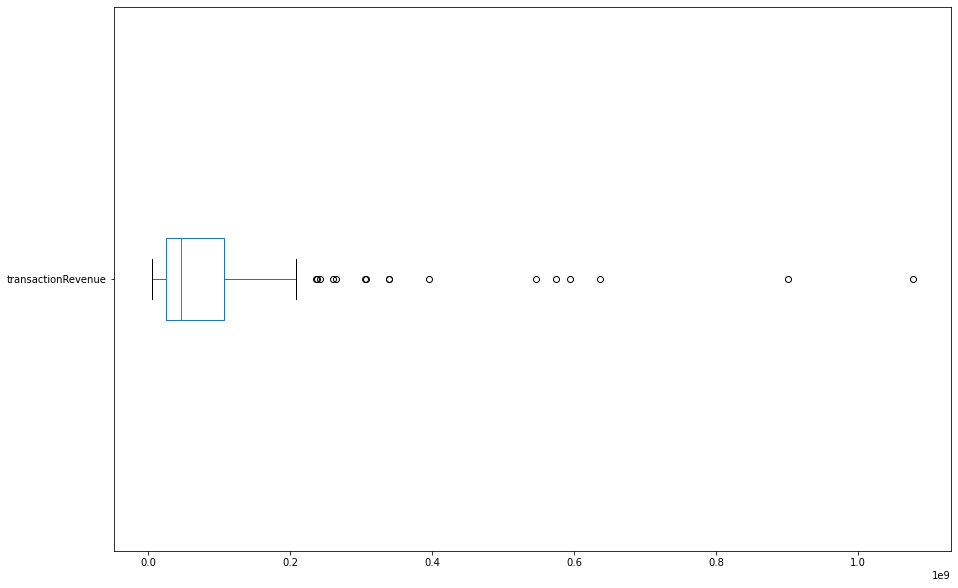

In [102]:
# none zero transactions revenue
plt.figure(figsize=(15, 10))
df_none_zero['transactionRevenue'].plot(kind='box', vert=False);

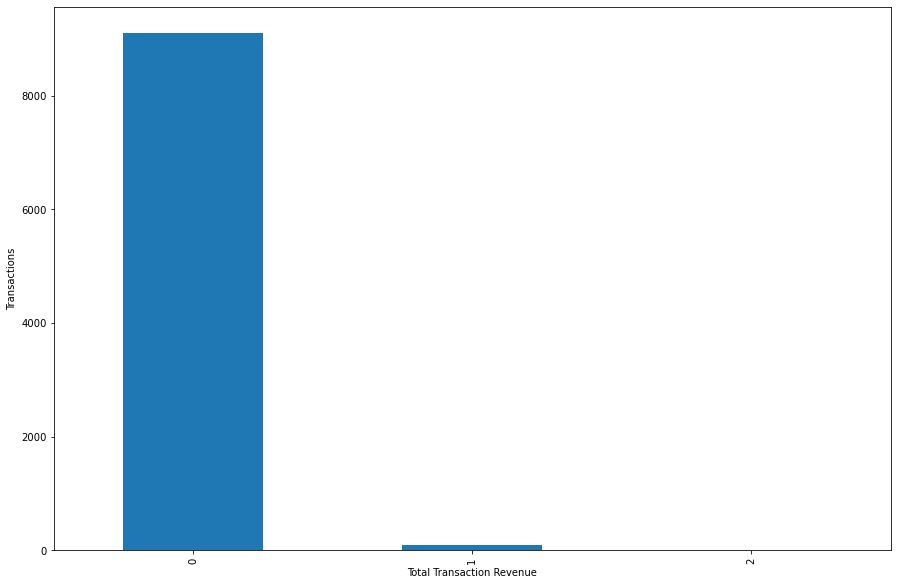

In [75]:
# all transactions
plt.figure(figsize=(15,10))
df_clean.groupby('transactions')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Transactions');

In [76]:
df_clean.groupby('transactions')['totalTransactionRevenue'].count()

transactions
0    9109
1      96
2       5
Name: totalTransactionRevenue, dtype: int64

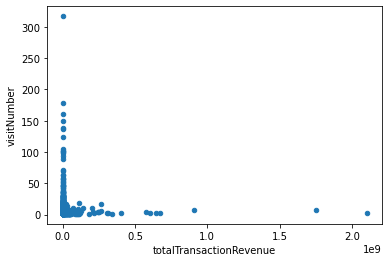

In [78]:
# all transactions
df_clean.plot(x='totalTransactionRevenue', y='visitNumber', kind='scatter');

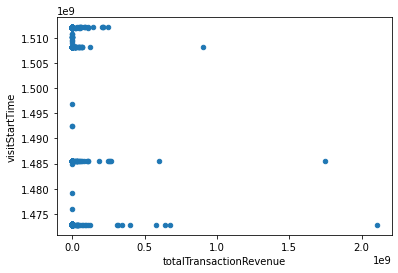

In [79]:
# all transactions
df_clean.plot(x='totalTransactionRevenue', y='visitStartTime', kind='scatter');

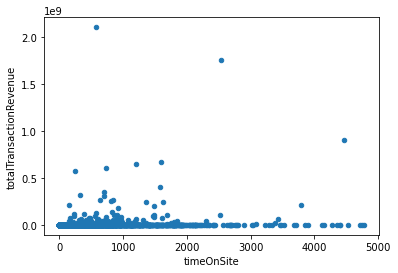

In [80]:
# all transactions
df_clean.plot(y='totalTransactionRevenue', x='timeOnSite', kind='scatter');

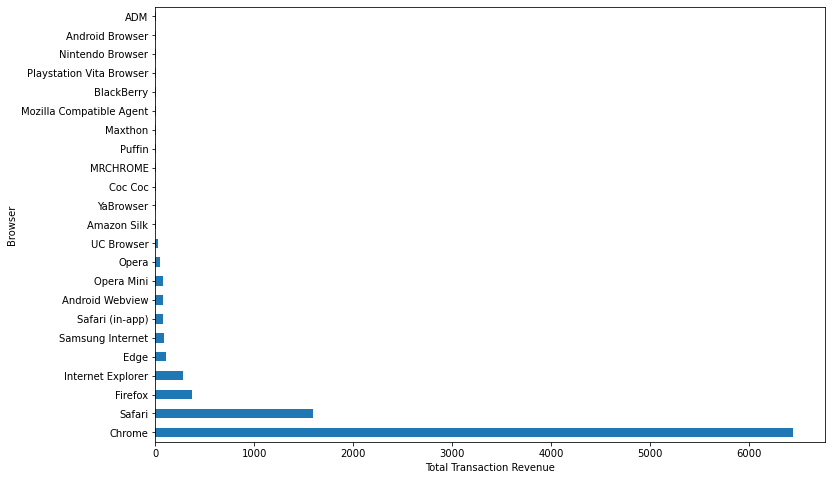

In [81]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('browser')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Browser');

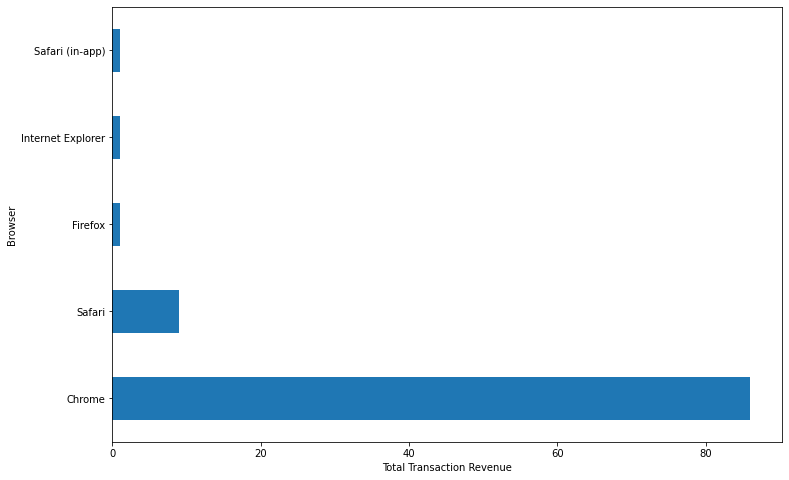

In [103]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('browser')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Browser');

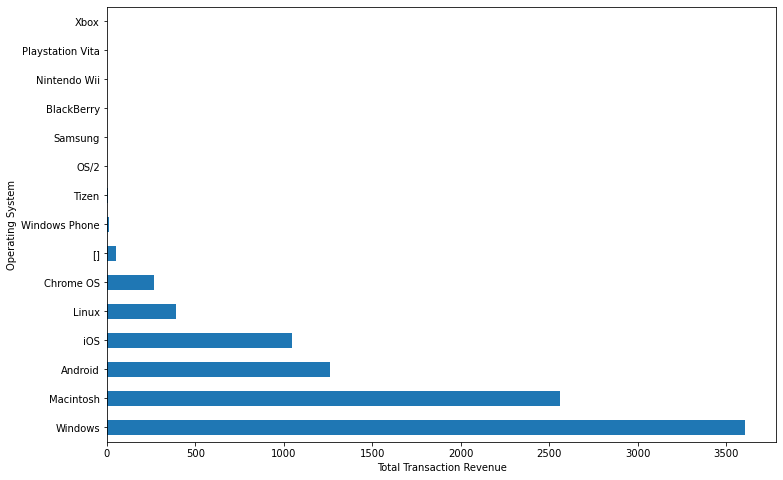

In [82]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('operatingSystem')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Operating System');

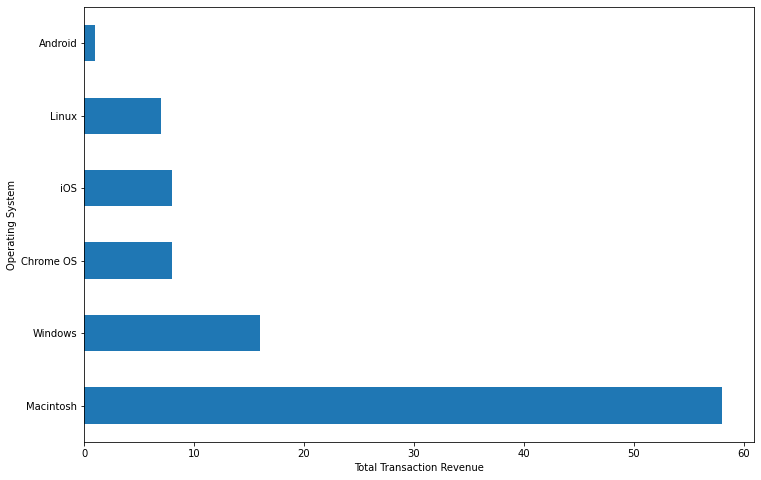

In [104]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('operatingSystem')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Operating System');

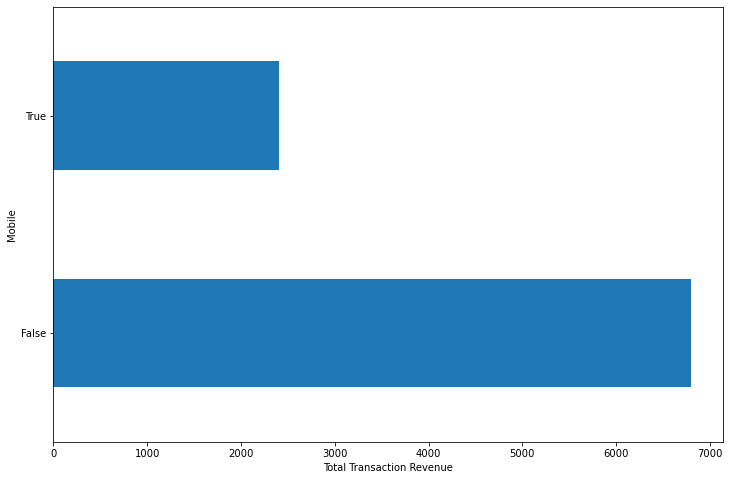

In [83]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('isMobile')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Mobile');

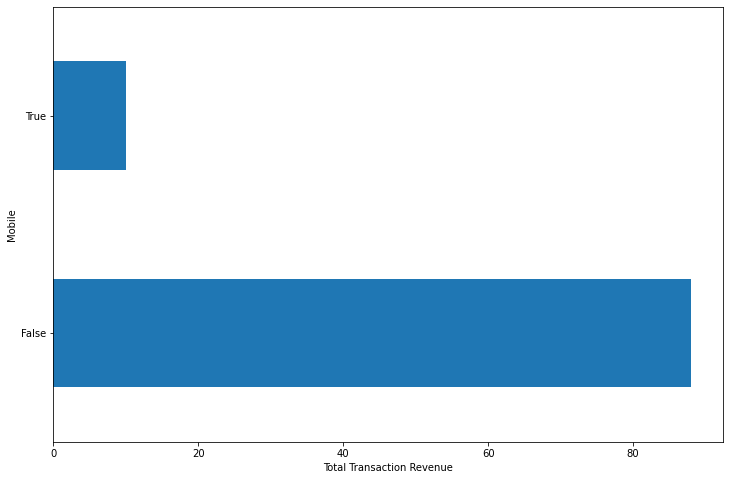

In [105]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('isMobile')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Mobile');

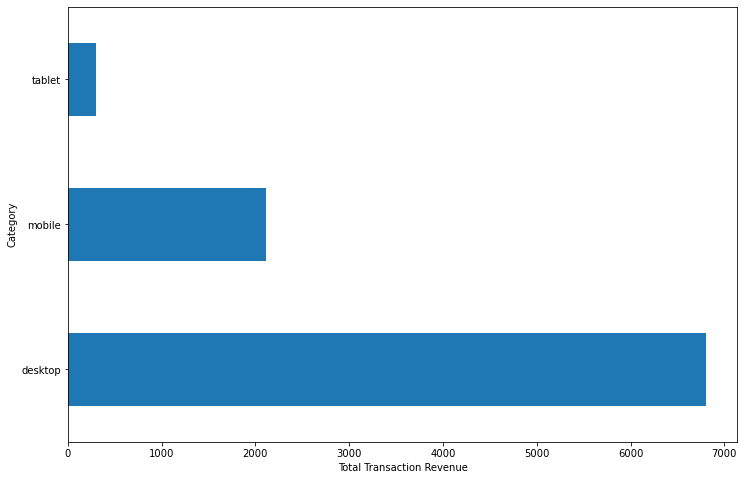

In [84]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('deviceCategory')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Category');

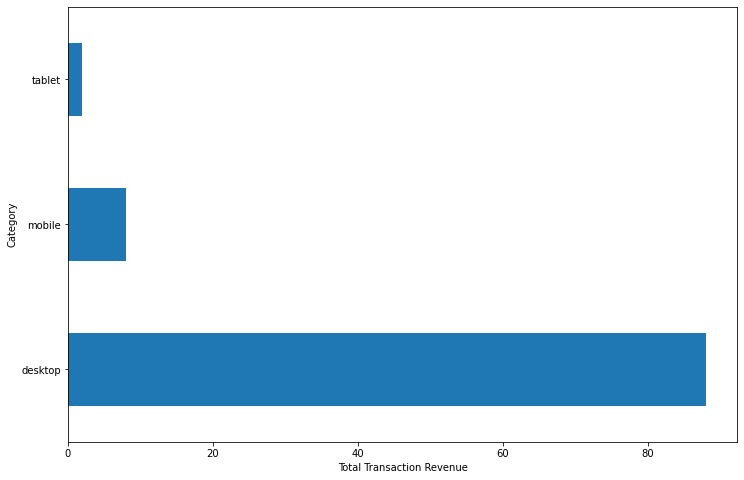

In [106]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('deviceCategory')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Category');

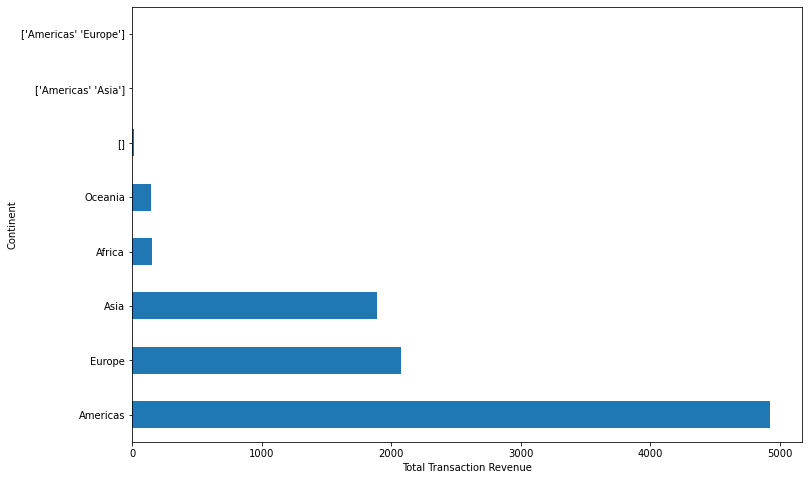

In [85]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('continent')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Continent');

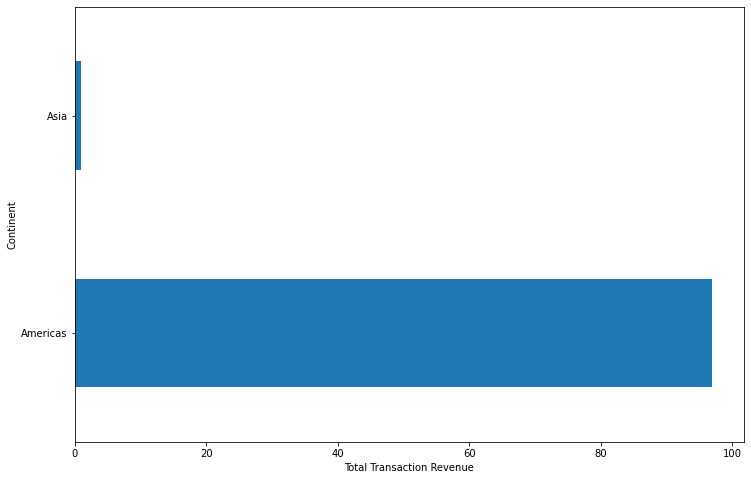

In [107]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('continent')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Continent');

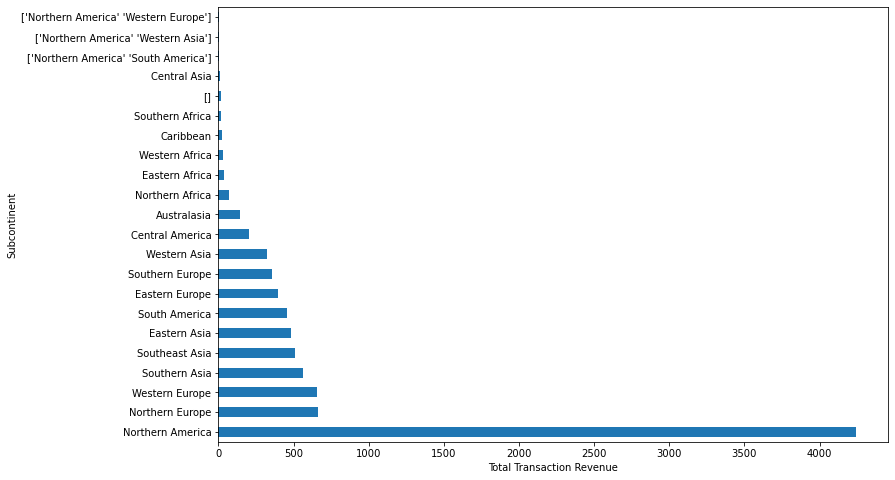

In [86]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('subContinent')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Subcontinent');

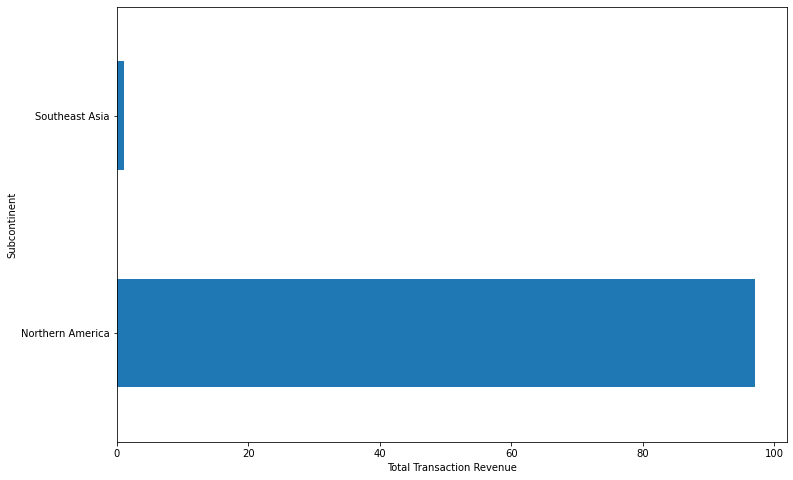

In [108]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('subContinent')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Subcontinent');

<Figure size 864x576 with 0 Axes>

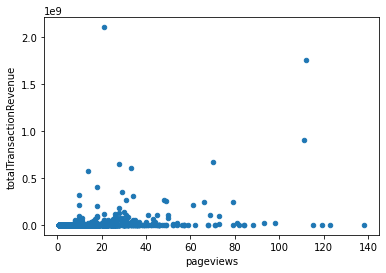

In [87]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.plot(y='totalTransactionRevenue', x='pageviews', kind='scatter');

<Figure size 864x576 with 0 Axes>

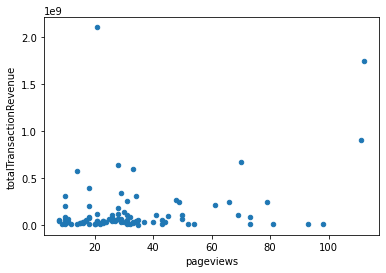

In [109]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.plot(y='totalTransactionRevenue', x='pageviews', kind='scatter');

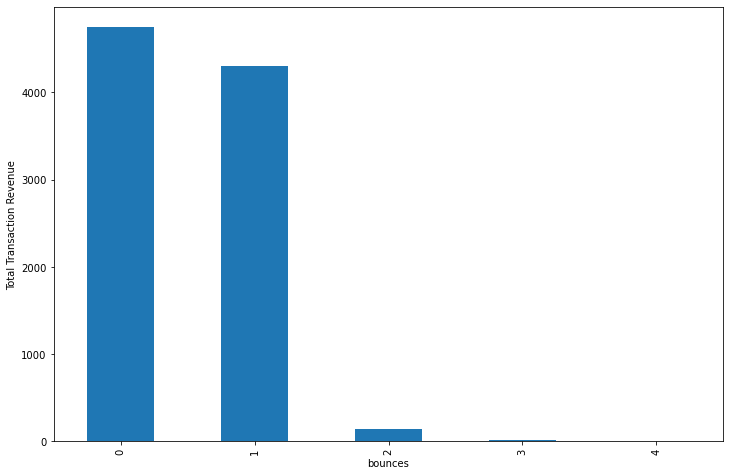

In [88]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('bounces')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('bounces');

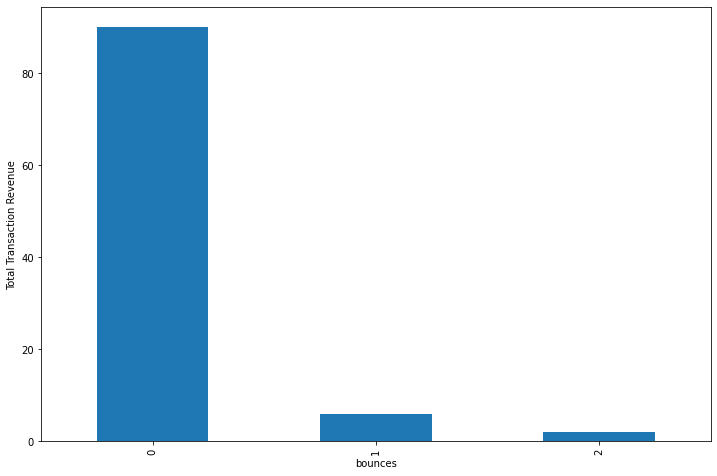

In [110]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('bounces')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('bounces');

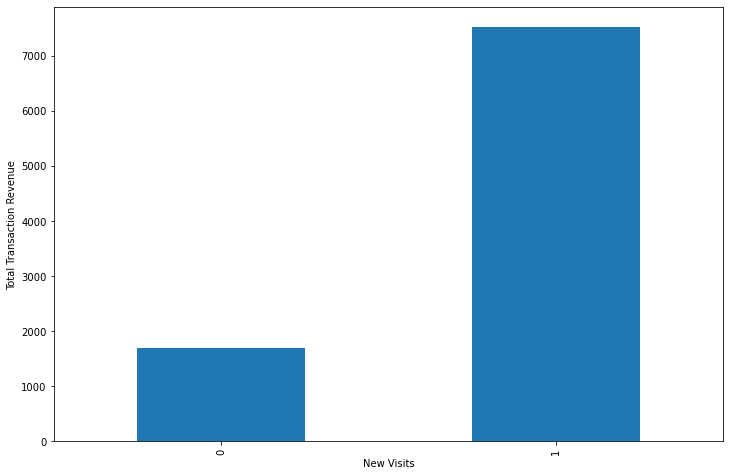

In [89]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('newVisits')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('New Visits');

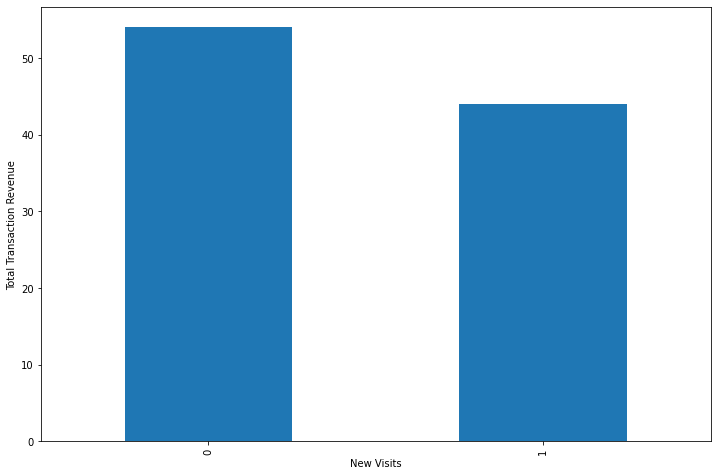

In [111]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('newVisits')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('New Visits');

<Figure size 864x576 with 0 Axes>

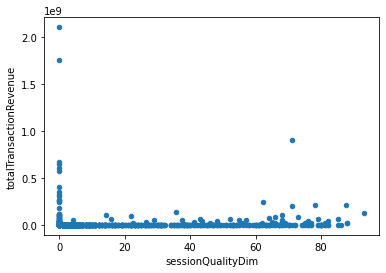

In [90]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.plot(y='totalTransactionRevenue', x='sessionQualityDim', kind='scatter');

<Figure size 864x576 with 0 Axes>

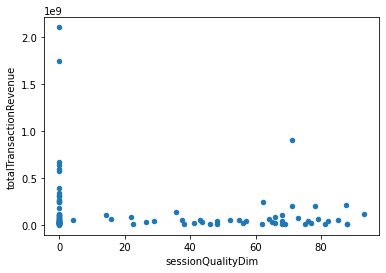

In [112]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.plot(y='totalTransactionRevenue', x='sessionQualityDim', kind='scatter');

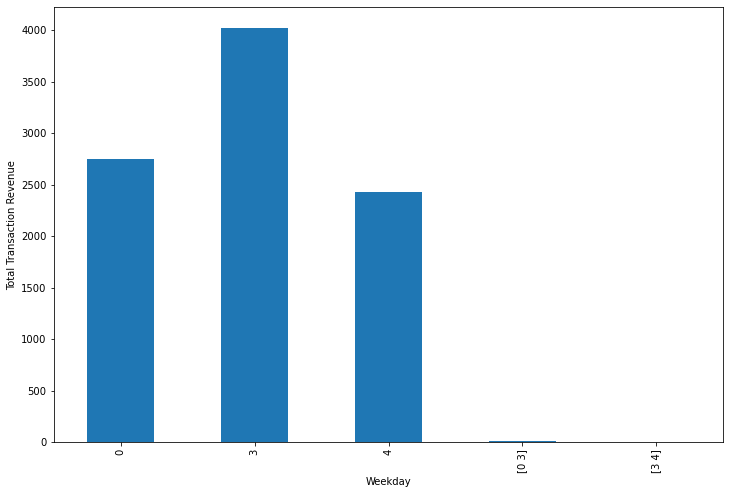

In [91]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('weekday')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Weekday');

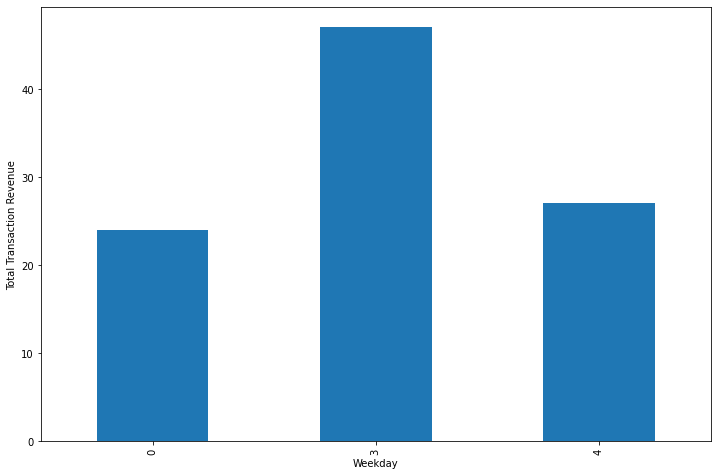

In [113]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('weekday')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Weekday');

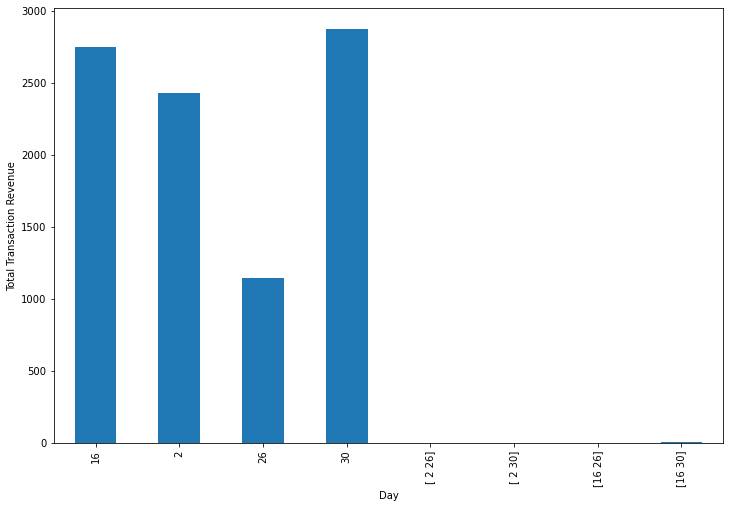

In [92]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('day')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Day');

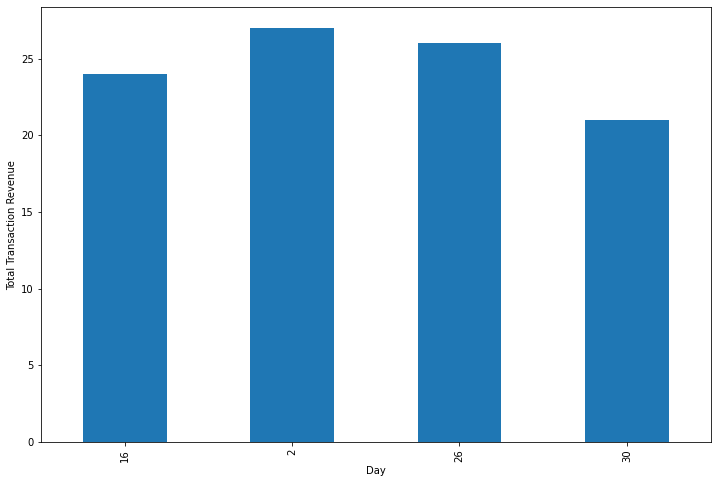

In [114]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('day')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Day');

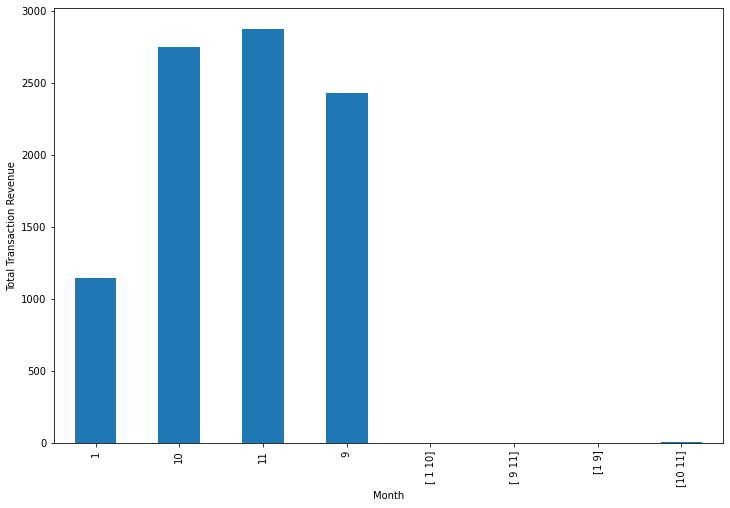

In [93]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('month')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Month');

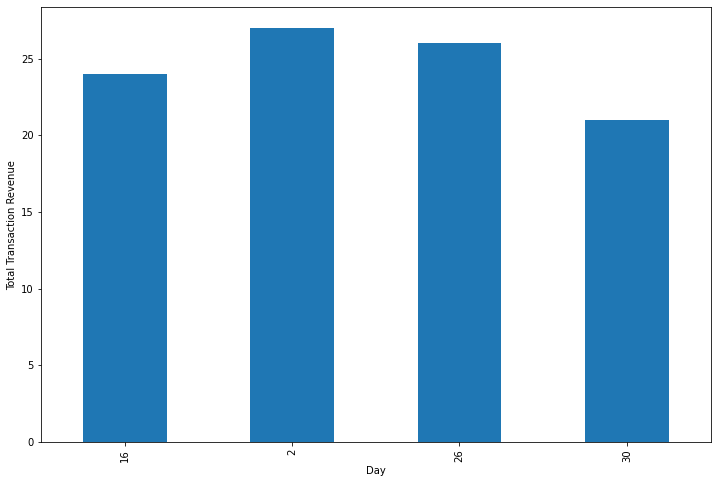

In [115]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('day')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Day');

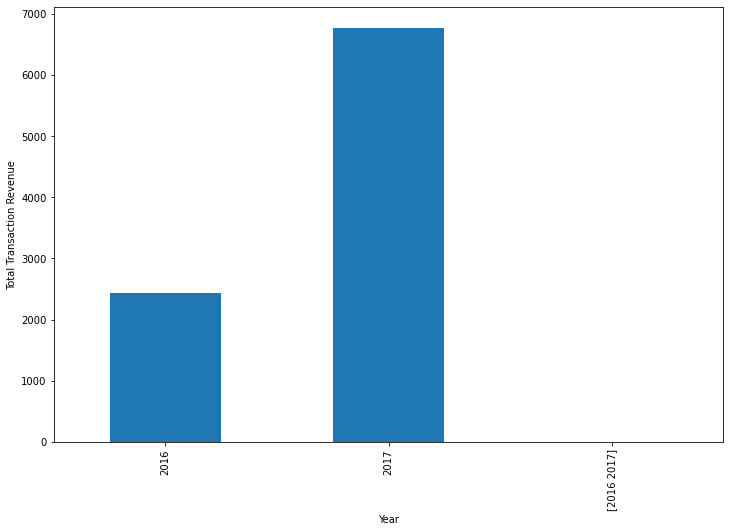

In [94]:
# all transactions
plt.figure(figsize=(12, 8))
df_clean.groupby('year')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Year');

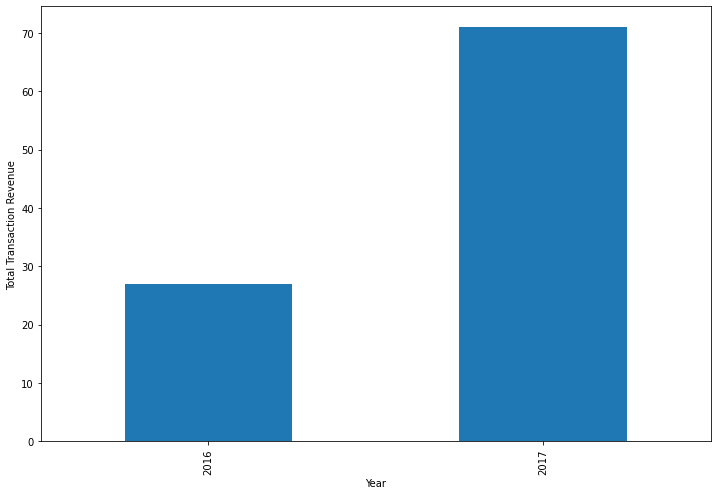

In [116]:
# none zero transactions revenue
plt.figure(figsize=(12, 8))
df_none_zero.groupby('year')['totalTransactionRevenue'].count().plot(kind='bar') 
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Year');

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

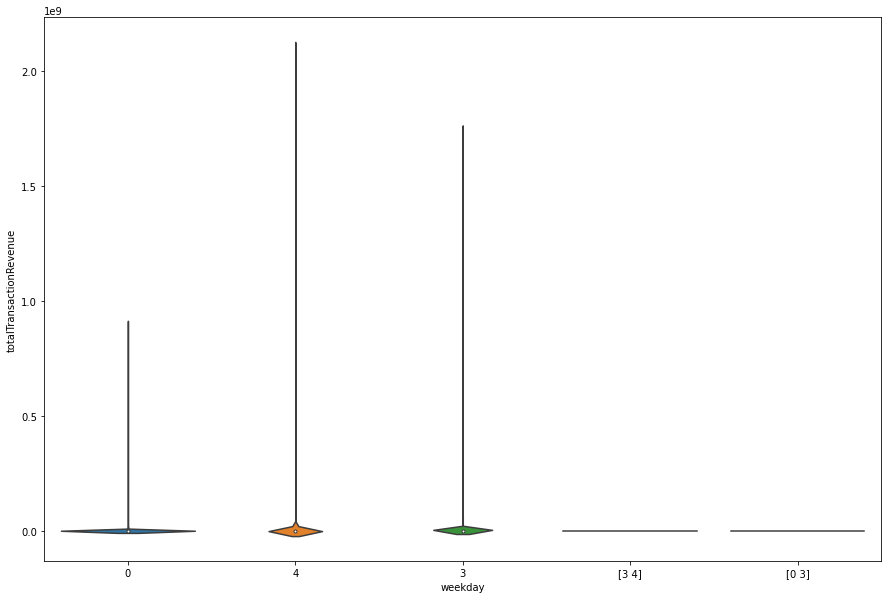

In [95]:
# all transactions
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

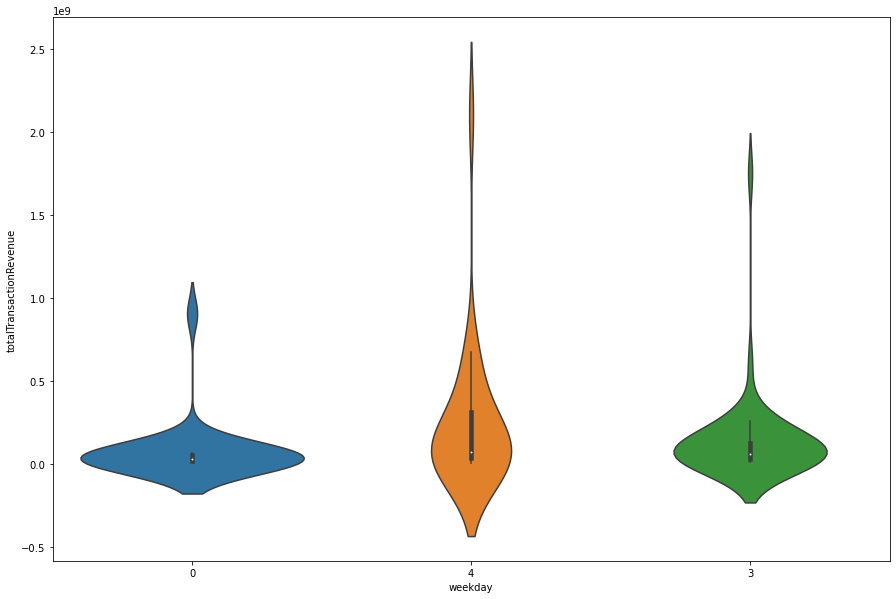

In [117]:
# none zero transactions revenue
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_none_zero, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

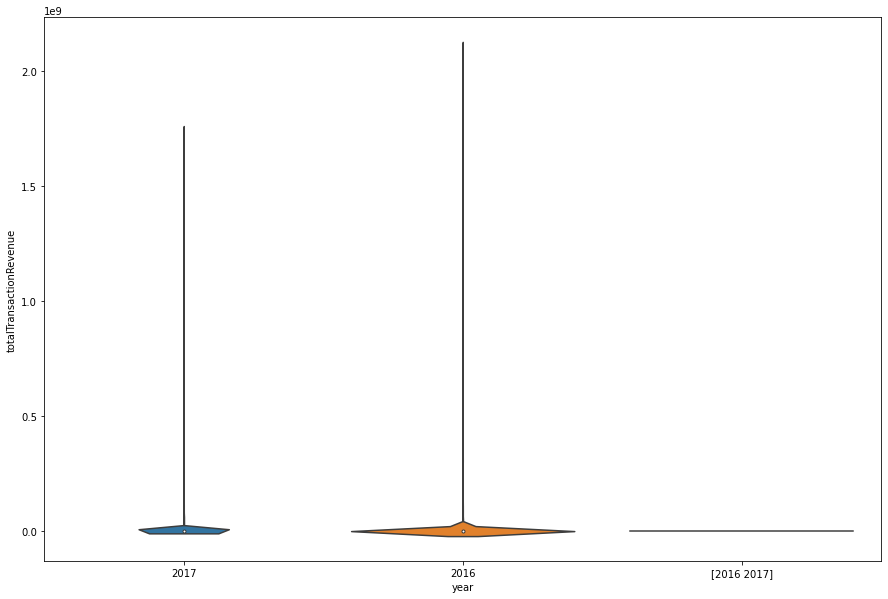

In [96]:
# all transactions
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

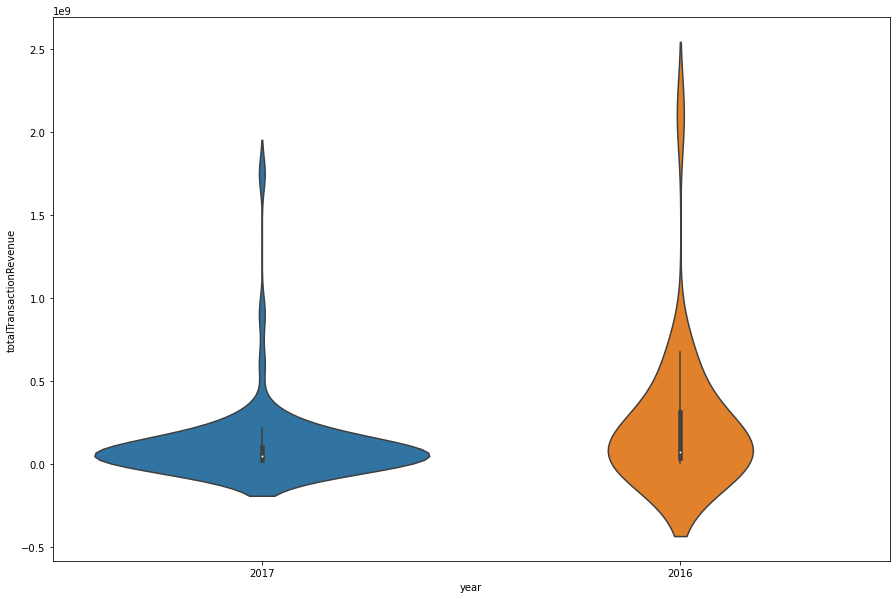

In [118]:
# none zero transactions revenue
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_none_zero, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

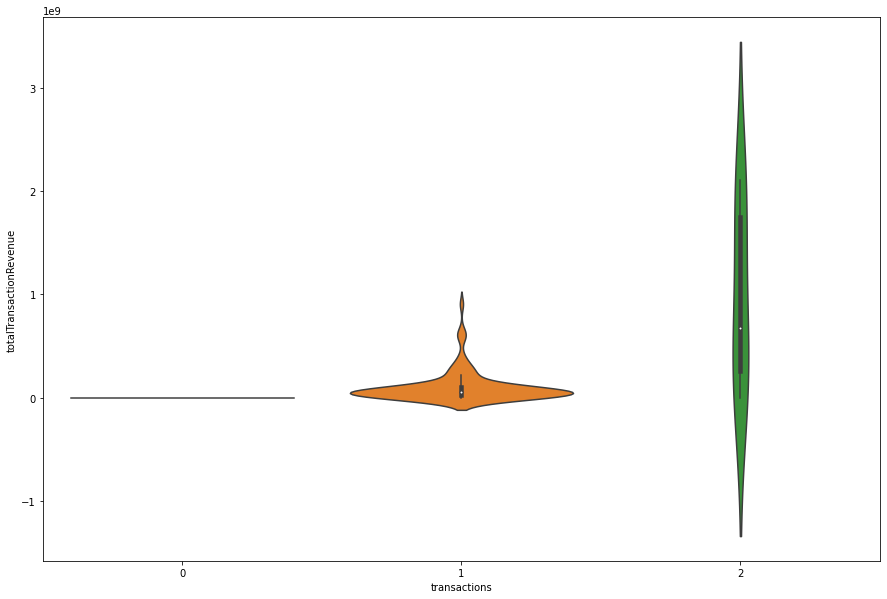

In [97]:
# all transactions
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

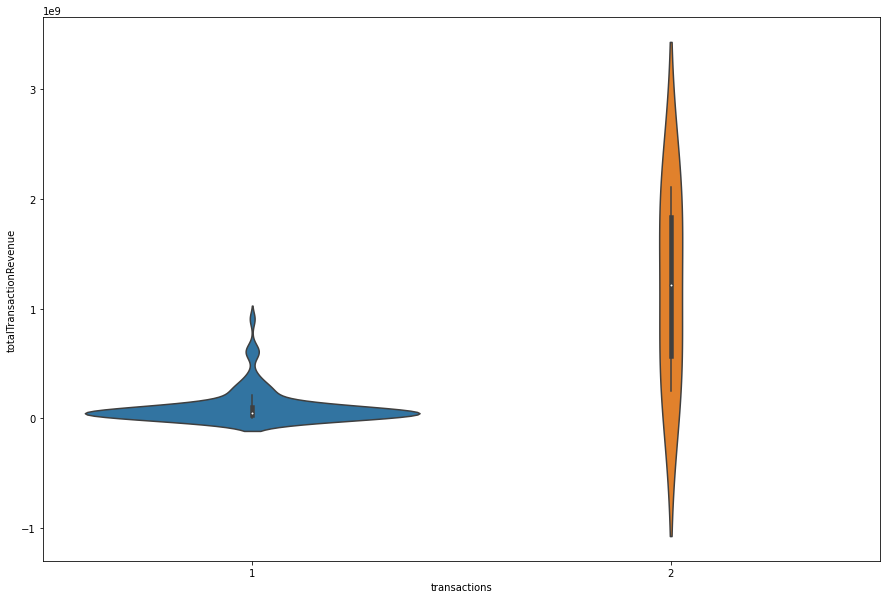

In [119]:
# none zero transactions revenue
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_none_zero, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='continent', ylabel='totalTransactionRevenue'>

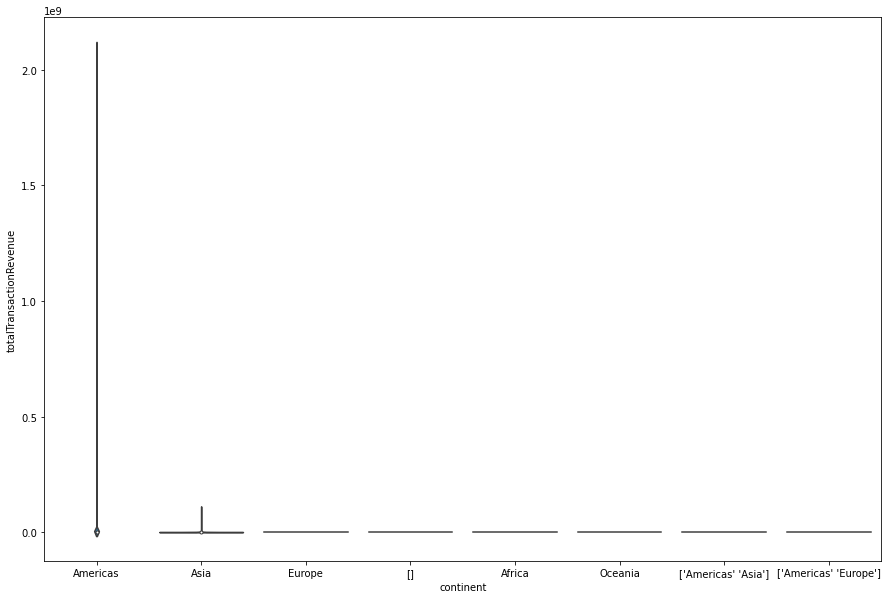

In [98]:
# all transactions
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'continent', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='continent', ylabel='totalTransactionRevenue'>

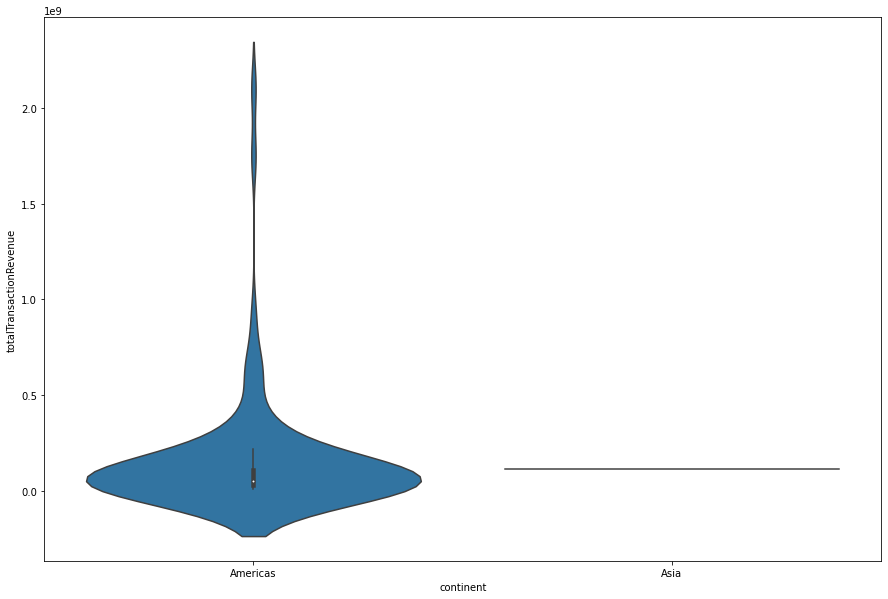

In [120]:
# none zero transactions revenue
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_none_zero, x = 'continent', y = 'totalTransactionRevenue')

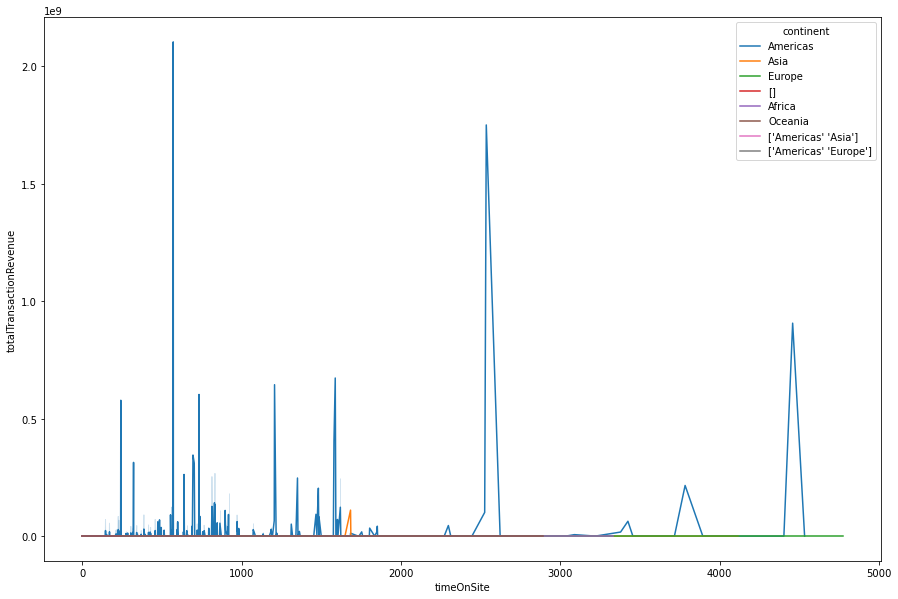

In [99]:
# all transactions
plt.figure(figsize = [15, 10]) 
sb.lineplot(data = df_clean, y = 'totalTransactionRevenue', x = 'timeOnSite', hue = 'continent');